
 Capomulin and Ramicane seem to reduce tumor size and increase metastatic sites. But they are
 less effective as the weight of the mice increases.
Ketapril, Naftisol, Stelasyn, Zoniferol and Propriva seem to have little effect on tumor growth. 
The results reflect that the othervariables are ineffective
Concluding that Capomulin is the most effective in reducing tumor size. 
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/prakashmaddirala/Downloads/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/prakashmaddirala/Downloads/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of each mouse ID.
mice = combined_data['Mouse ID'].value_counts()
mice



Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

In [3]:
# number of unique mouse IDs
number_mice = len(mice)
number_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = combined_data.loc[duplicated_mice, 'Mouse ID'].unique()

duplicated_mice_ID


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice_ID_data = combined_data.loc[combined_data['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop(duplicated_mice_ID_data.index)
clean_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [7]:
# Checking the number of mice in the clean DataFrame.
no_duplicates = len(clean_df['Mouse ID'].unique())
no_duplicates

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

drug_regimen = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Mean
mean = drug_regimen['Tumor Volume (mm3)'].mean()

# Median
median = drug_regimen['Tumor Volume (mm3)'].median()

# Variance 
var = drug_regimen['Tumor Volume (mm3)'].var()

# Standard deviation
std = drug_regimen['Tumor Volume (mm3)'].std()

# SEM: return unbiased stardard error of mean 
sem = drug_regimen['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
summaryI_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard Deviation': std,
    'SEM': sem
})

#Summary Table by Drug Regimen
summaryI_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summaryII_df = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

#rename columns to match
summaryII_agg = summaryII_df.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})

#print
summaryII_agg


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
#calculate # of mice per drug regimen

mice_per_drug = drug_regimen['Mouse ID'].count().sort_values(ascending=False)
mice_per_drug


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

<Axes: title={'center': 'Number of Mice per Treatment'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

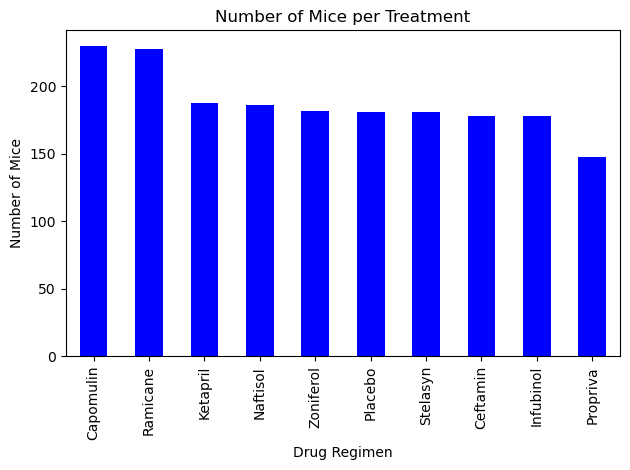

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = mice_per_drug.plot.bar(color='b')

# Set the xlabel, ylabel, and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

#save image
plt.tight_layout()
bar_plot.figure.savefig('Images/pd_bar_mice_per_drug.png')

#Print
bar_plot

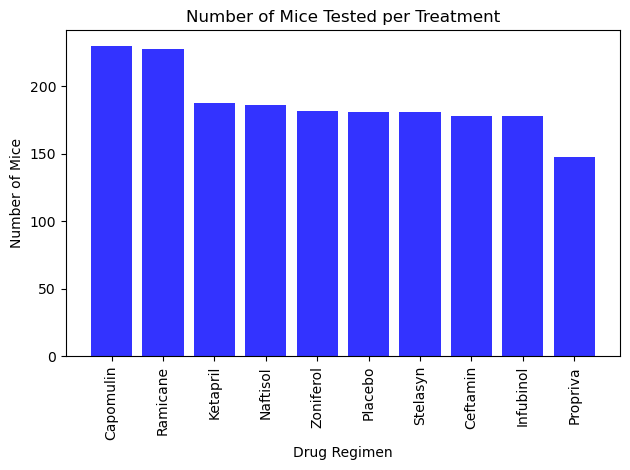

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_per_drug.index.values
y_axis = mice_per_drug.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.savefig('Images/py_bar_mice_per_drug.png')

plt.show()

In [13]:
# Get the unique mice with their gender
sex_mice = clean_df.groupby('Sex')['Sex'].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

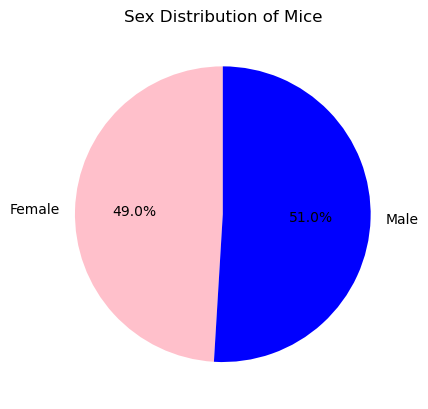

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
Sex_pie = sex_mice.plot.pie(
    autopct='%1.1f%%',  # Display percentages
    colors=['pink', 'blue'],  # Colors for the slices
    startangle=90,  # Rotate the pie chart
    ylabel='',  # Hide the default y-label
    title='Sex Distribution of Mice'  # Title of the chart
)

# Show the plot
Sex_pie

#save
Sex_pie.figure.savefig('Images/pd_pie_mice_sex.png')



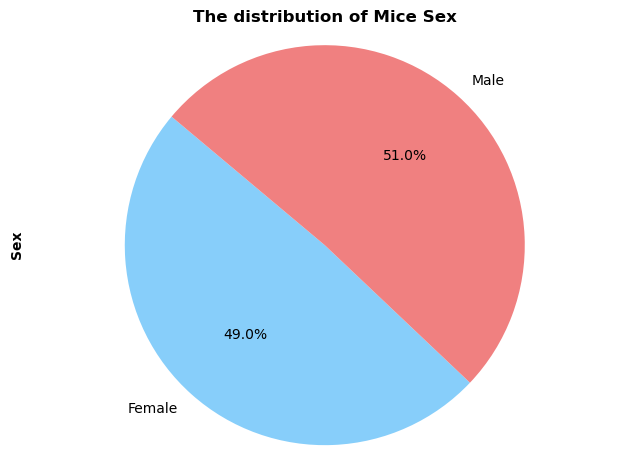

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Set x_axis and colors
sex = sex_mice.index
colors = ['lightskyblue','lightcoral']

# Create pie chart
pyplot_pie_chart = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
plt.title('The distribution of Mice Sex', fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')

# Save an image of pie chart
plt.tight_layout()
plt.savefig('Images/py_pie_mice_sex.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()


## Quartiles, Outliers and Boxplots

In [16]:
# Focus only on four regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse
final_tumor_vol = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

C:\Users\kaitl\AppData\Local\Temp\ipykernel_16620\813898845.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})


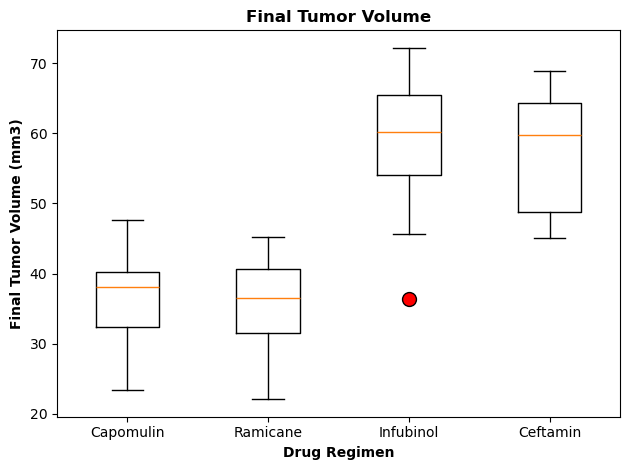

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
final_tumor_plot.figure.savefig('Images/final_tumor_boxplot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Look at mice treated by capomulin - I picked the first one
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,0,45.000000,0
175,b128,Capomulin,Female,9,22,5,45.651331,0
176,b128,Capomulin,Female,9,22,10,43.270852,0
177,b128,Capomulin,Female,9,22,15,43.784893,0
178,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1831,y793,Capomulin,Male,17,17,25,38.992734,2
1832,y793,Capomulin,Male,17,17,30,35.726023,2
1833,y793,Capomulin,Male,17,17,35,36.327870,2
1834,y793,Capomulin,Male,17,17,40,31.475411,2


In [20]:
#Isolate mouse b128 data
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,0,45.000000,0
175,b128,Capomulin,Female,9,22,5,45.651331,0
176,b128,Capomulin,Female,9,22,10,43.270852,0
177,b128,Capomulin,Female,9,22,15,43.784893,0
178,b128,Capomulin,Female,9,22,20,42.731552,0


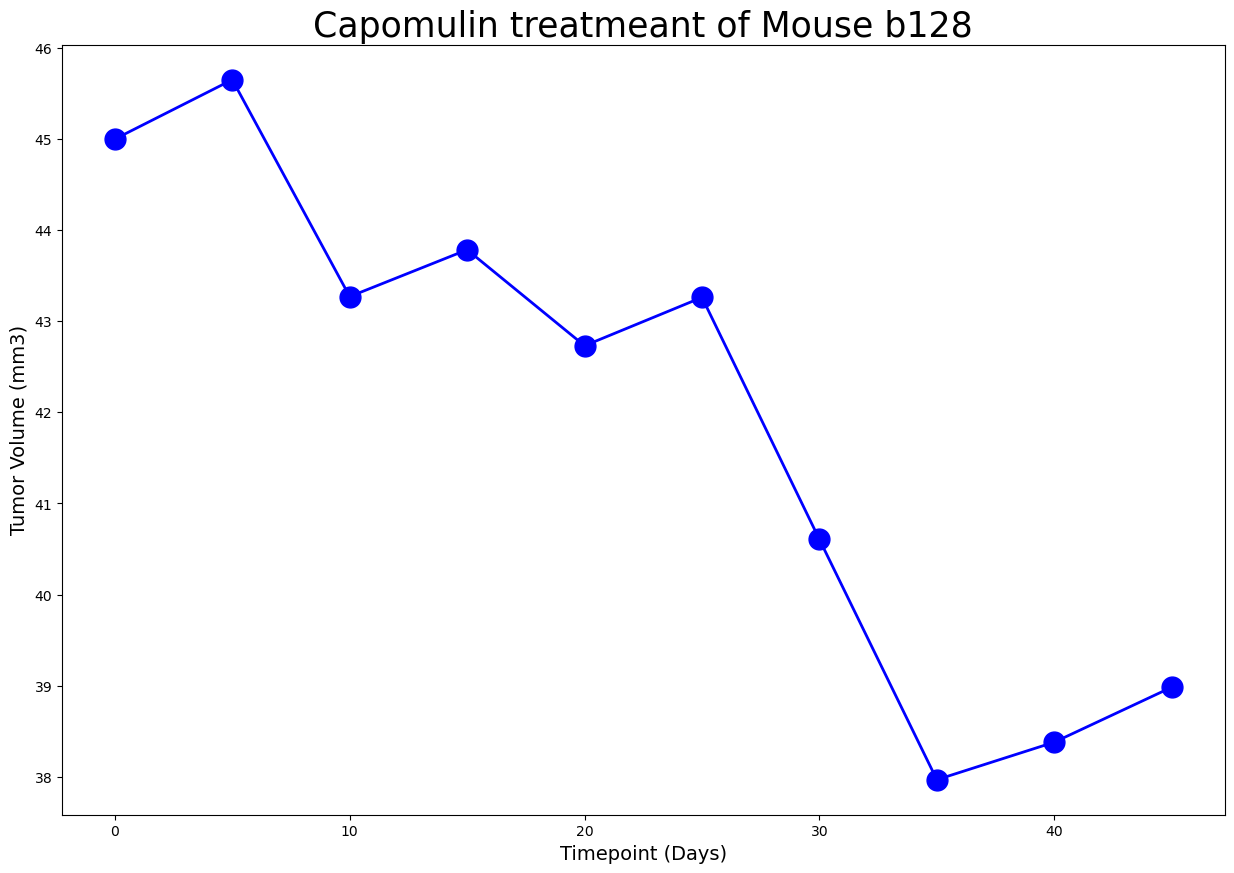

In [21]:
#Create the Scatter Plot 
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of Mouse b128',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

#save
plt.savefig("Images/line_graph.png", bbox_inches = "tight")
plt.show()

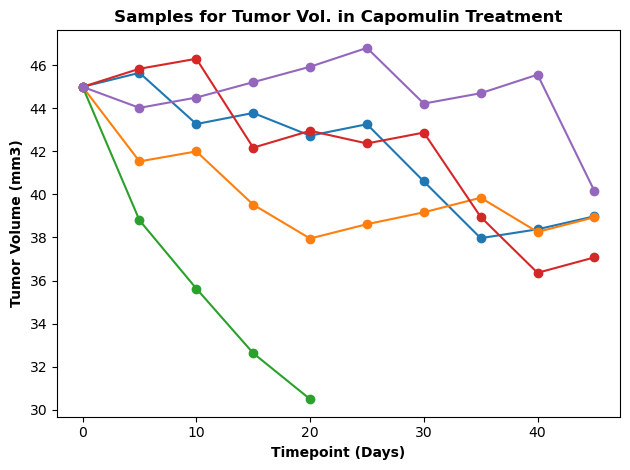

In [22]:
#Plot for all Capomulin Regimen 

# Identify specific mouse ID and get data of the mouse id
mice_cap = Capomulin_df['Mouse ID'].unique()

for mouse in mice_cap[0:5]:
    mouse_cap_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse]
    # Generate a line plot
    plt.plot(mouse_cap_df['Timepoint'], mouse_cap_df['Tumor Volume (mm3)'], marker='o')

# Set x/y label, title
plt.title(f"Samples for Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Save line graph to Images folder
plt.tight_layout()
plt.savefig('Images/tumor_plot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

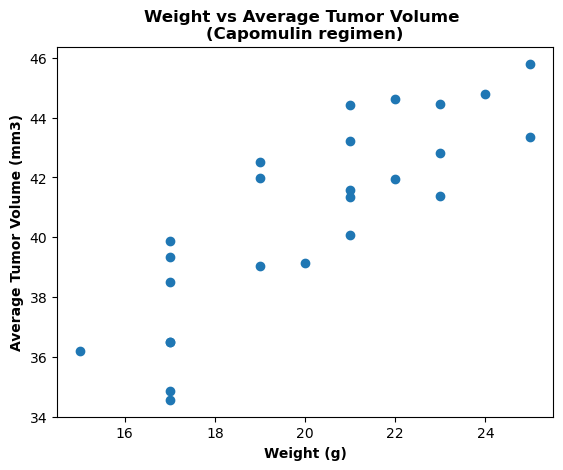

In [23]:
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
Capomulin_df = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean(numeric_only=True)
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Set x/y label, title
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/scatter_weight_tumor.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and tumor vol is 0.84
The r-squared is: 0.71


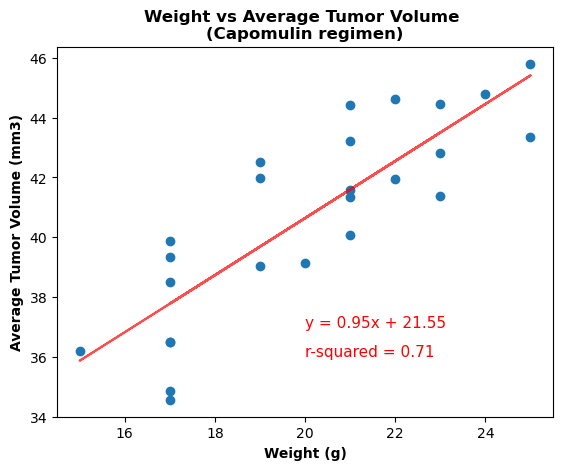

In [25]:
# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/scatter_weight_tumor_linear.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()